<h1>TAREA 11</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<li>Estudiarelsoportematemáticoeimplementar,como una función en python, alguno de los siguientes detectores y/o descriptores de imágenes:</li>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>


# HOG - Histogram of Oriented Gradients
Es un descriptor de caracteristicas usado para la deteccion de objetos, fue creado por Robert K. McConnell de Wayland Research Inc en 1986.

## Teoria
El pensamiento prinvipal detras de HOG es que la pariencia y forma local de un objeto en una imagen puede ser dercrita por la distribucion de la intencidad del los gradientes o la deteccion de bordes. La imagen es dividida en pequeñas regiones conectadas y por cada pixel de estas regiones se calcula un histograma de gradientes.
## Algoritmo
### Preprocesamiento
La imagen que se tiene que re-escalar a una imagen que sea multiplo de 8, ya que la imagen se dividira en grupos de 8x8.
### Gradientes de la imagen
Para calcular el descriptor de HOG, se necesita primero calcular los gradientes de la imagen, porque esto es nesesario para calcular el histograma de gradientes. Se puede lograr al filtrar la imagen con los siguientes Kernels
![Kernels](./Fig/Kernels.png)
Ejemplo de calcular gradientes
![Example 1](./Fig/Gradientes.png)
Para cada pixel, el gradiente tiene una magnitud y direccion, en casos de que la imagen este a color el gradiente tiene tres componentes pero se elije el mayor de los tres.
### Calcular histograma en grupos de 8x8
Se divide la imagen en grupos de tamaño 8x8 y se hace el histograma de gradientes, este se hace de la sigueinte manera, se toma la direccion del pixel y se suma el valor de la magnitud a nuestro histograma, en caso de que el valor sea intermedio, la magnitud de este se reparte entre los dos puntos.
![calc 1](./Fig/Calc.png)
En el ejemplo de la imagen estan usando solo gradientes sin "signo" que son los cuales tienen una direccion menor a 180.
### Normalizacion 16x16
Esta normalizacion se hace para hacer el descriptor de HOG invariante a la intencidad de luz de la imagen, se hace tomando 4 secciones de la imagen y normalizando los histogramas de estos.
![calc 1](./Fig/norm.gif)
### Calcular el HOG
Los valores normalizados se concatenan y este es el descriptor HOG de la imagen


GUIA de HOG : http://www.learnopencv.com/histogram-of-oriented-gradients/

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from numpy import linalg as LA
img = cv2.imread('Fig/baboon.png',0)
img_grid = np.zeros_like(img);

print "Listo"

Listo


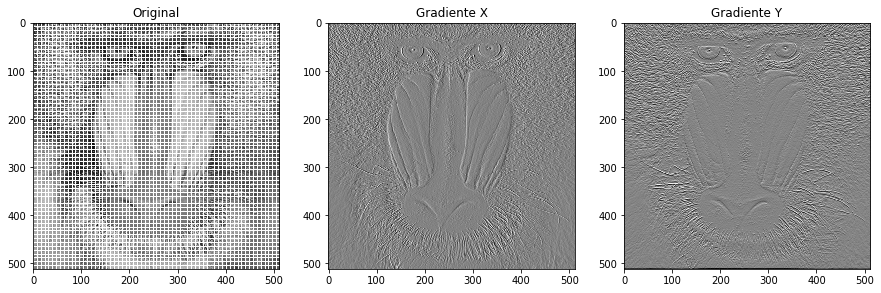

In [2]:
img_grid = np.zeros_like(img);
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)


def divide_img():
    w,h = img_grid.shape
    sec = []
    for i in range(0,w,8):
        for j in range(0,h,8):
            img_grid[i:i+2,:]=255
            img_grid[:,i:i+2]= 255
divide_img()

plt.figure(1,figsize=(15,5))
plt.subplot(131), plt.imshow(cv2.add(img,img_grid), cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(gx, cmap=plt.cm.gray), plt.title('Gradiente X')
plt.subplot(133), plt.imshow(gy, cmap=plt.cm.gray), plt.title('Gradiente Y')
plt.show()

In [3]:
def calc_histogram(win_mag,win_ang):
    w,h = win_mag.shape
    hist=np.zeros(18)
    for i in range(0,w):
        for j in range(0,h):
            diff=win_ang[j,i]/20 - int(win_ang[j,i]/20)
            if(int(win_ang[j,i]/20)+1 > 17):
                hist[0]=+win_mag[j,i]*diff
            else:
                hist[int(win_ang[j,i]/20)+1]=+win_mag[j,i]*diff
                
            hist[int(win_ang[j,i]/20)]=+win_mag[j,i]*(1-diff)
    return hist

def histograms(img):
    w,h = img.shape
    
    img1 = np.float32(img.copy()) / 255.0
    gx = cv2.Sobel(img1, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img1, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    histograms=[]
    for i in range(0,w,8):
        for j in range(0,h,8):
            img_grid[j, i:i+8]= 255
            histograms.append(calc_histogram(mag[j:j+8,i:i+8],angle[j:j+8,i:i+8]))
    return histograms
    
def normal_16x16(w,hist_arr):
    size = int(w/8)
    HOG = []
    row = 1
    for i in range(0,len(hist_arr)-size-1):
        #print i, row*size-1
        if(row*size-1 < i):
            row += 1
        else:
            #print i, i+size, len(hist_arr)
            normal_vec = np.concatenate([hist_arr[i], hist_arr[i+1], hist_arr[i+size],hist_arr[i+size+1]])
            norm = LA.norm(normal_vec)
            HOG.append(normal_vec/norm)
            hist_arr[i] = hist_arr[i]/norm
            hist_arr[i+1] = hist_arr[i+1]/norm
            hist_arr[i+2] = hist_arr[i+2]/norm
            hist_arr[i+3] = hist_arr[i+3]/norm
        
    return hist_arr, HOG
hist = histograms(img)
hist, HOG = normal_16x16(img.shape[0],hist)
print "Histogramas imagen :", len(hist)
print "Histograma region 0(18): ", hist[0]
print "Horizontal: ", img.shape[0]/8, "Vertical: ", img.shape[1]/8
print "HOG: ", (len(HOG))
print "TamaHOG:", (len(HOG[0]))



Histogramas imagen : 4096
Histograma region 0(18):  [ 0.0298819   0.10328934  0.03530592  0.0210957   0.02425307  0.08501001
  0.07487733  0.02702326  0.0596412   0.06582978  0.          0.02957898
  0.01472766  0.06159191  0.02184969  0.04114754  0.08238453  0.11449597]
Horizontal:  64.0 Vertical:  64.0
HOG:  3969
TamaHOG: 72


In [4]:
print len(HOG[0])

72
